In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from distmetrics import compute_mahalonobis_dist_2d, get_asf_rtc_burst_ts, read_asf_rtc_image_data, despeckle_rtc_arrs_with_tv
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

References:

- https://en.wikipedia.org/wiki/2024_Chile_wildfires

In [3]:
BURST_ID = 'T018_038457_IW2'

In [4]:
df_rtc_ts = get_asf_rtc_burst_ts(BURST_ID)
print('# of results: ', df_rtc_ts.shape[0])
df_rtc_ts.head()

# of results:  22


,opera_id,acq_datetime,polarization,url_vh,url_vv,track_number,geometry,dedup_id
0,OPERA_L2_RTC-S1_T018-038457-IW2_20231007T23284...,2023-10-07 23:28:48+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,18,"POLYGON ((-71.56223 -33.27870, -71.50894 -33.2...",OPERA_L2_RTC-S1_T018-038457-IW2_20231007T232848Z
1,OPERA_L2_RTC-S1_T018-038457-IW2_20231019T23284...,2023-10-19 23:28:48+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,18,"POLYGON ((-71.56304 -33.27879, -71.50975 -33.2...",OPERA_L2_RTC-S1_T018-038457-IW2_20231019T232848Z
2,OPERA_L2_RTC-S1_T018-038457-IW2_20231031T23284...,2023-10-31 23:28:48+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,18,"POLYGON ((-71.56189 -33.27894, -71.09011 -33.1...",OPERA_L2_RTC-S1_T018-038457-IW2_20231031T232848Z
3,OPERA_L2_RTC-S1_T018-038457-IW2_20231112T23284...,2023-11-12 23:28:48+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,18,"POLYGON ((-71.56319 -33.27800, -71.09140 -33.1...",OPERA_L2_RTC-S1_T018-038457-IW2_20231112T232848Z
4,OPERA_L2_RTC-S1_T018-038457-IW2_20231124T23284...,2023-11-24 23:28:47+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,18,"POLYGON ((-71.56064 -33.27817, -71.08885 -33.1...",OPERA_L2_RTC-S1_T018-038457-IW2_20231124T232847Z


In [5]:
arrs_vv, profiles = read_asf_rtc_image_data(df_rtc_ts.url_vv.tolist())
arrs_vh, _ = read_asf_rtc_image_data(df_rtc_ts.url_vh.tolist())

Loading RTC data: 100%|██████████████████████████████████████████████████| 22/22 [00:23<00:00,  1.09s/it]


In [8]:
arrs_vv_d = despeckle_rtc_arrs_with_tv(arrs_vv)
arrs_vh_d = despeckle_rtc_arrs_with_tv(arrs_vh)

Despeckling: 100%|███████████████████████████████████████████████████████| 22/22 [00:05<00:00,  3.79it/s]


In [21]:
for k, date in enumerate(df_rtc_ts.acq_datetime):
    print(k, date)

0 2023-10-07 23:28:48+00:00
1 2023-10-19 23:28:48+00:00
2 2023-10-31 23:28:48+00:00
3 2023-11-12 23:28:48+00:00
4 2023-11-24 23:28:47+00:00
5 2023-12-06 23:28:47+00:00
6 2023-12-18 23:28:46+00:00
7 2023-12-30 23:28:46+00:00
8 2024-01-11 23:28:45+00:00
9 2024-01-23 23:28:44+00:00
10 2024-02-04 23:28:44+00:00
11 2024-02-16 23:28:44+00:00
12 2024-02-28 23:28:44+00:00
13 2024-03-11 23:28:44+00:00
14 2024-03-23 23:28:44+00:00
15 2024-04-04 23:28:45+00:00
16 2024-04-16 23:28:45+00:00
17 2024-04-28 23:28:46+00:00
18 2024-05-10 23:28:46+00:00
19 2024-05-22 23:28:45+00:00
20 2024-06-03 23:28:45+00:00


The fires started ~Feb 4.

In [104]:
pre_slice = slice(0, 10) # excludes last index
post_index = 10

In [105]:
dist_ob = compute_mahalonobis_dist_2d(arrs_vv_d[pre_slice],
                                      arrs_vh_d[pre_slice],
                                      arrs_vv_d[post_index],
                                      arrs_vh_d[post_index],
                                      kernel_size=3)

In [106]:
dist_ob.__fields__

{'dist': FieldInfo(annotation=ndarray, required=True),
 'mean': FieldInfo(annotation=ndarray, required=True),
 'cov': FieldInfo(annotation=ndarray, required=True),
 'cov_inv': FieldInfo(annotation=ndarray, required=True)}

Text(0, 0.5, 'Easting (m)')

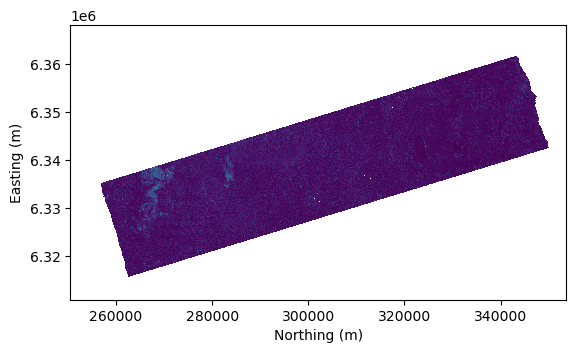

In [107]:
fig, ax = plt.subplots()
show(dist_ob.dist, interpolation='none', transform=profiles[0]['transform'], ax=ax)
ax.set_xlabel('Northing (m)')
ax.set_ylabel('Easting (m)')

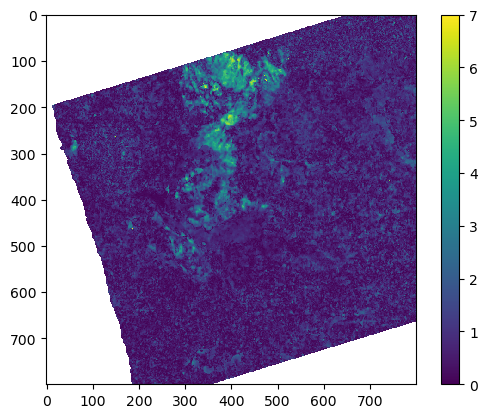

In [108]:
s = np.s_[900:1700, 200:1000]
plt.imshow(dist_ob.dist[s], interpolation='none', vmin=0, vmax=7)
plt.colorbar()

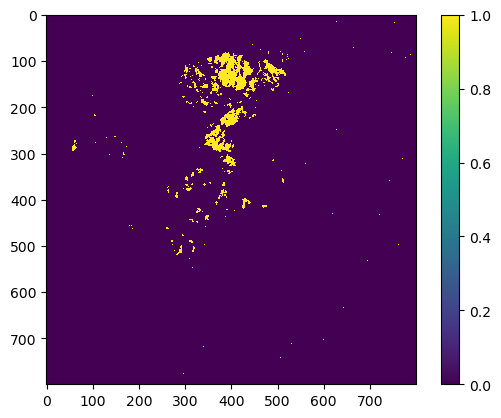

In [109]:
plt.imshow(dist_ob.dist[s] > 3, interpolation='none')
plt.colorbar()